Variance of price: 12.815351425712858
Mean of price: 2019.0825
Median of price: 2019.0


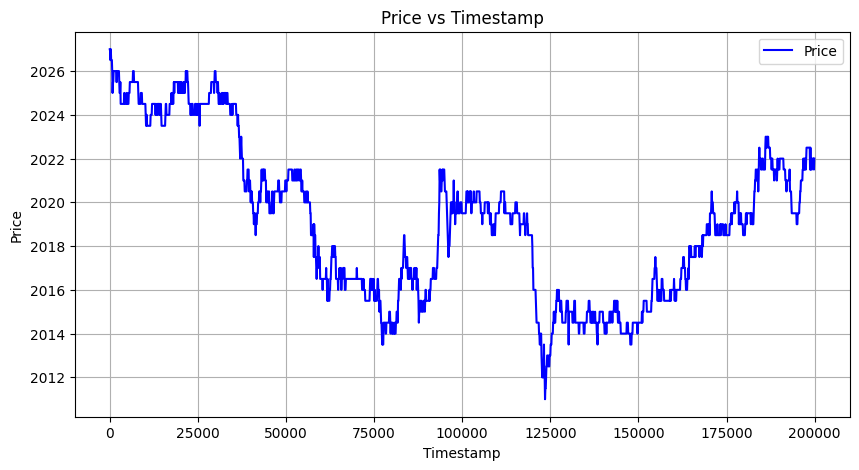

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv('so_far_best_output.csv')
var = data["price"].var()
print("Variance of price:", var)

mean = data["price"].mean()
print("Mean of price:", mean)

median = data["price"].median()
print("Median of price:", median)

# Plot price vs timestamp
plt.figure(figsize=(10, 5))
plt.plot(data['timestamp'], data['price'], label='Price', color='blue')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.title('Price vs Timestamp')
plt.legend()
plt.grid()
plt.show()

# Plot quantity vs timestamp
# plt.figure(figsize=(10, 5))
# plt.plot(data['timestamp'], data['quantity'], label='Quantity', color='green')
# plt.xlabel('Timestamp')
# plt.ylabel('Quantity')
# plt.title('Quantity vs Timestamp')
# plt.legend()
# plt.grid()
# plt.show()

In [56]:
unique_timestamps = data['timestamp'].nunique()
print(f"Number of unique timestamps: {unique_timestamps}")

Number of unique timestamps: 2000


Mean Squared Error: 0.09843024724994445
Model Coefficients: [ 0.00610395  0.00847118 -0.0132875   0.01145302 -0.02189476  0.20111709
  0.80390133]
Sum of Coefficients: 0.995864309680394
Model Intercept: 8.341580579113497


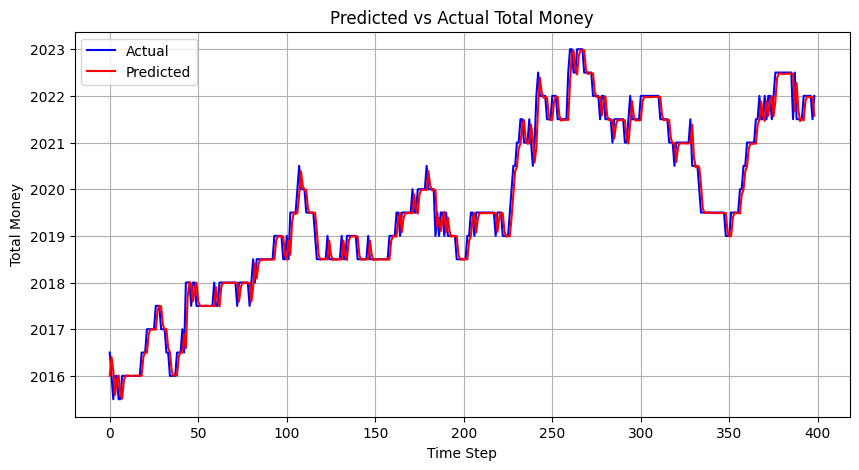

In [57]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Calculate the total money for each trade
data['total_money'] = data['price'] 

# Define the moving window size (n)
n = 7

# Prepare the data for the autoregressive model
X, y = [], []
for i in range(n, len(data)):
    X.append(data['total_money'].iloc[i-n:i].values)  # Past n values
    y.append(data['total_money'].iloc[i])            # Current value

X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Train the autoregressive model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Display the coefficients of the model
print("Model Coefficients:", model.coef_)
sum = 0
for i in range(len(model.coef_)):
    sum += model.coef_[i]
print("Sum of Coefficients:", sum)
print("Model Intercept:", model.intercept_)
# Plot the predictions vs actual values
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red')
plt.xlabel('Time Step')
plt.ylabel('Total Money')
plt.title('Predicted vs Actual Total Money')
plt.legend()
plt.grid()

Mean Squared Error: 0.09843024724994445
Model Coefficients: [ 0.00610395  0.00847118 -0.0132875   0.01145302 -0.02189476  0.20111709
  0.80390133]
Sum of Coefficients: 0.995864309680394
Model Intercept: 8.341580579113497


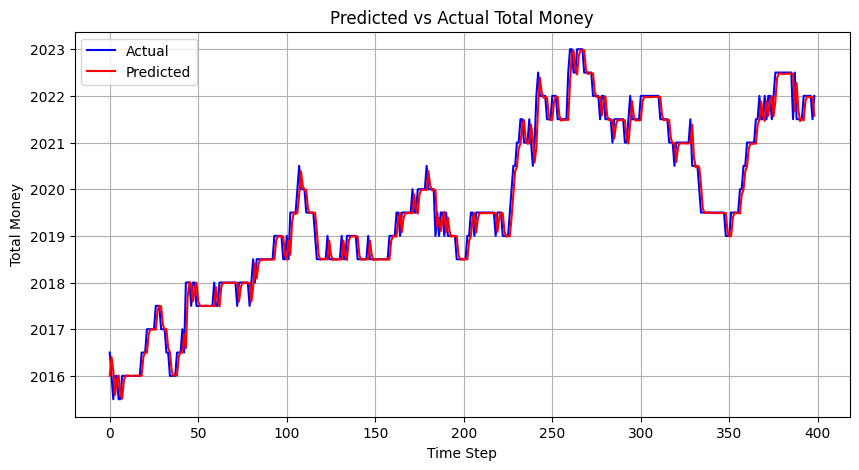

In [58]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Calculate the total money for each trade
data['total_money'] = data['price'] 

# Define the moving window size (n)
n = 7

# Prepare the data for the autoregressive model
X, y = [], []
for i in range(n, len(data)):
    X.append(data['total_money'].iloc[i-n:i].values)  # Past n values
    y.append(data['total_money'].iloc[i])            # Current value

X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Train the autoregressive model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Display the coefficients of the model
print("Model Coefficients:", model.coef_)
sum = 0
for i in range(len(model.coef_)):
    sum += model.coef_[i]
print("Sum of Coefficients:", sum)
print("Model Intercept:", model.intercept_)
# Plot the predictions vs actual values
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red')
plt.xlabel('Time Step')
plt.ylabel('Total Money')
plt.title('Predicted vs Actual Total Money')
plt.legend()
plt.grid()

ARIMA Model MSE: 16.575625


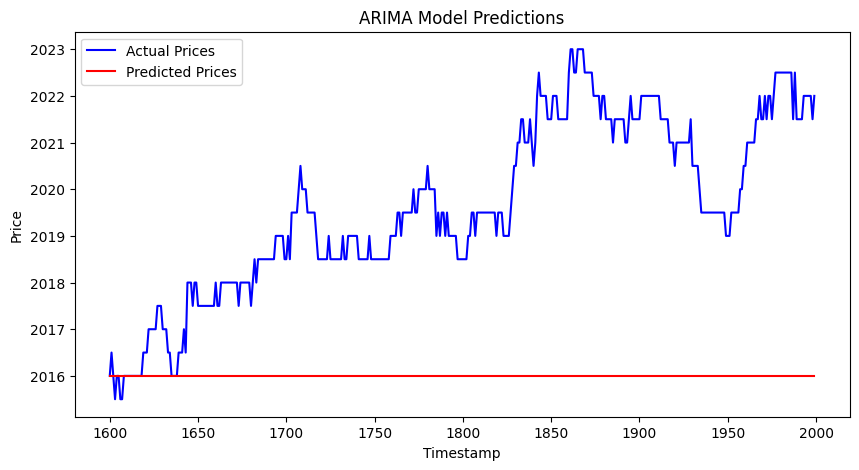

In [59]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Sort the data by timestamp
data = data.sort_values(by='timestamp')

# Extract the price column as a time series
price_series = data['price']

# Split the data into training and testing sets
train_size = int(len(price_series) * 0.8)
train, test = price_series[:train_size], price_series[train_size:]

# Fit the ARIMA model
arima_model = ARIMA(train, order=(5, 1, 0))  # (p, d, q) parameters
arima_result = arima_model.fit()

# Make predictions
predictions = arima_result.forecast(steps=len(test))

# Evaluate the model
mse = mean_squared_error(test, predictions)
print(f"ARIMA Model MSE: {mse}")

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(test.index, test, label='Actual Prices', color='blue')
plt.plot(test.index, predictions, label='Predicted Prices', color='red')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.title('ARIMA Model Predictions')
plt.legend()
plt.show()

In [60]:
!pip install statsmodels


[notice] A new release of pip is available: 24.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [61]:
# data = pd.read_csv('samyak2.csv')
# variance = data['price'].var()
# print(f"Variance of the price data: {variance}")

# # Calculate the mean of the price data
# mean = data['price'].mean()
# print(f"Mean of the price data: {mean}")

# plt.figure(figsize=(10, 5))
# plt.plot(data['timestamp'], data['price'], label='Price', color='blue')
# plt.xlabel('Timestamp')
# plt.ylabel('Price')
# plt.title('Price vs Timestamp')
# plt.legend()
# plt.grid()
# plt.show()


In [62]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Calculate the total money for each trade
data['total_money'] = data['price'] 
all_mse = []
# Define the moving window size (n)
for i in range(1, 40):

# Prepare the data for the autoregressive model
    X, y = [], []
    for i in range(n, len(data)):
        X.append(data['total_money'].iloc[i-n:i].values)  # Past n values
        y.append(data['total_money'].iloc[i])            # Current value

    X = np.array(X)
    y = np.array(y)

    # Split the data into training and testing sets
    split_index = int(0.8 * len(X))
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    # Train the autoregressive model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    # print(f"Mean Squared Error: {mse}")
    all_mse.append(mse)

# Display the coefficients of the model
    # print("Model Coefficients:", model.coef_)
    sum = 0
    for i in range(len(model.coef_)):
        sum += model.coef_[i]
    # print("Sum of Coefficients:", sum)
    # print("Model Intercept:", model.intercept_)
# Plot the predictions vs actual values
# plt.figure(figsize=(10, 5))
# plt.plot(y_test, label='Actual', color='blue')
# plt.plot(y_pred, label='Predicted', color='red')
# plt.xlabel('Time Step')
# plt.ylabel('Total Money')
# plt.title('Predicted vs Actual Total Money')
# plt.legend()
# plt.grid()

print(all_mse)
print(min(all_mse))
print(len(all_mse))

[0.09843024724994445, 0.09843024724994445, 0.09843024724994445, 0.09843024724994445, 0.09843024724994445, 0.09843024724994445, 0.09843024724994445, 0.09843024724994445, 0.09843024724994445, 0.09843024724994445, 0.09843024724994445, 0.09843024724994445, 0.09843024724994445, 0.09843024724994445, 0.09843024724994445, 0.09843024724994445, 0.09843024724994445, 0.09843024724994445, 0.09843024724994445, 0.09843024724994445, 0.09843024724994445, 0.09843024724994445, 0.09843024724994445, 0.09843024724994445, 0.09843024724994445, 0.09843024724994445, 0.09843024724994445, 0.09843024724994445, 0.09843024724994445, 0.09843024724994445, 0.09843024724994445, 0.09843024724994445, 0.09843024724994445, 0.09843024724994445, 0.09843024724994445, 0.09843024724994445, 0.09843024724994445, 0.09843024724994445, 0.09843024724994445]
0.09843024724994445
39


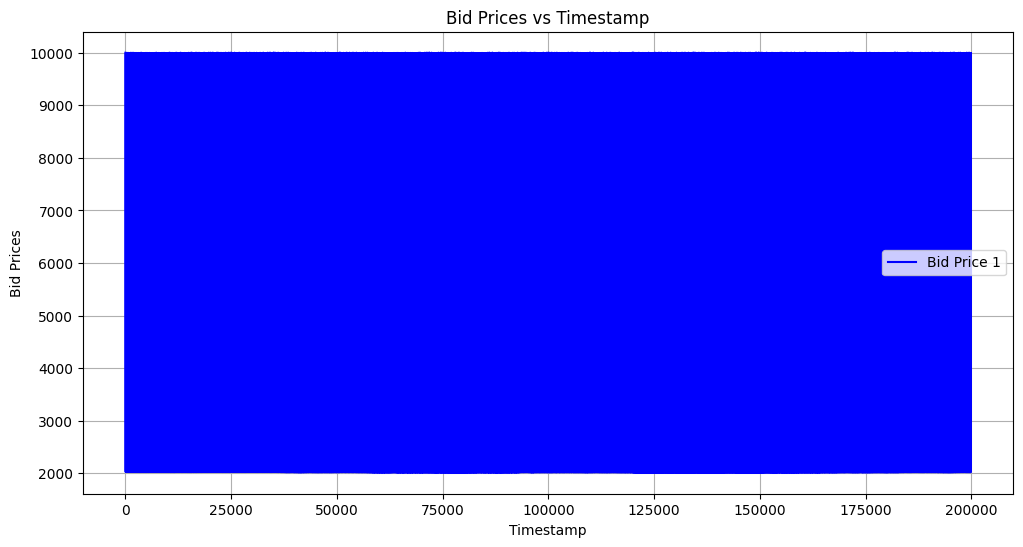

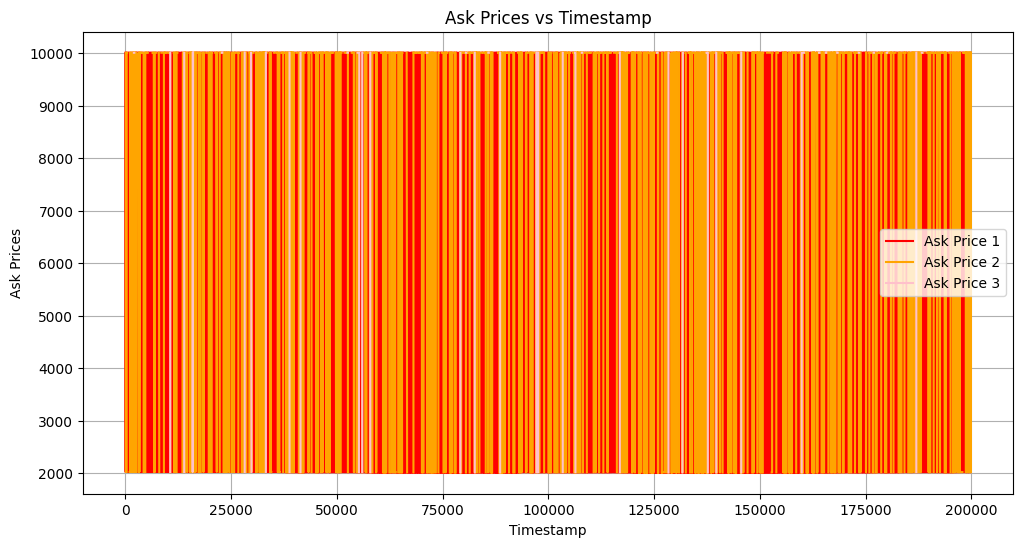

In [63]:
import pandas as pd

import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv('alldata.csv', delimiter=';')

# Plot all the bids vs timestamp
plt.figure(figsize=(12, 6))
plt.plot(data['timestamp'], data['bid_price_1'], label='Bid Price 1', color='blue')
# plt.plot(data['timestamp'], data['bid_price_2'], label='Bid Price 2', color='green')
# plt.plot(data['timestamp'], data['bid_price_3'], label='Bid Price 3', color='purple')
plt.xlabel('Timestamp')
plt.ylabel('Bid Prices')
plt.title('Bid Prices vs Timestamp')
plt.legend()
plt.grid()
plt.show()

# Plot all the asks vs timestamp
plt.figure(figsize=(12, 6))
plt.plot(data['timestamp'], data['ask_price_1'], label='Ask Price 1', color='red')
plt.plot(data['timestamp'], data['ask_price_2'], label='Ask Price 2', color='orange')
plt.plot(data['timestamp'], data['ask_price_3'], label='Ask Price 3', color='pink')
plt.xlabel('Timestamp')
plt.ylabel('Ask Prices')
plt.title('Ask Prices vs Timestamp')
plt.legend()
plt.grid()
plt.show()